# Predicting Diabetics
The aim of this project to analyze the medical factors of a patient such as Glucose Level, Blood Pressure, Skin Thickness, Insulin Level and many others to predict whether the patient has diabetes or not.

## About the Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Data Dictionary

           Feature     	                                Description
                    
           Pregnancies  	                        Number of times pregnant
                    
           Glucose                                 Plasma glucose concentration a 2 hours in an oral glucose tolerance test
                    
           BloodPressure	                        Diastolic blood pressure (mm Hg)
                    
           SkinThickness	                        Triceps skin fold thickness (mm)
                    
           Insulin	                                2-Hour serum insulin (mu U/ml)
                    
           BMI	                                    Body mass index (weight in kg/(height in m)^2)
                    
           DiabetesPedigreeFunction	                Diabetes pedigree function
                    
           Age	                                    Age (years)
                    
           Outcome	                                Class variable (0 or 1)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import messagebox
import joblib

## Loading Data


In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [3]:
pd.read_csv?

In [4]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing


In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

Checking the unique values for all the variable in the dataset

In [6]:
#checking unique values
variables = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
for i in variables:
    print(diabetes_dataset[i].unique())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
[  0  94 168  88 543 846 175 230  83  96 235 

The Pregnancies column  and outcome column except this 2 varibles can have the value as 0 but other variable like Glucose and Blood pressure should not have 0 values. if so, then this data will conisders and incorrect information

Now we will check the count of value 0 in the every variables except "pregnacies" and "outcome"


In [7]:
# checking missing values
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',]
for i in variables:
    count = 0
    for x in (diabetes_dataset[i]):
        if x == 0:
            count = count + 1
    print(i,count)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


The above result shows us those variables have 0 values in column. So, the data has incorrect values in the datset.

Now, I will change the 0 values with mean of that variable.

Replacing the 0 values for this variable 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' with there mean values.

In [8]:
#replacing the missing values with the mean
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in variables:
    diabetes_dataset[i].replace(0,diabetes_dataset[i].mean(),inplace=True)

Now, I will check the values are replaced or not

In [9]:
#checking to make sure that incorrect values are replace
for i in variables:
    count = 0
    for x in (diabetes_dataset[i]):
        if x == 0:
            count = count + 1
    print(i,count)

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


Now, I have change the 0 values to mean of the variable 

The data is correct to train the model

In [10]:
#missing values
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Descriptive Statistics

In [11]:
#getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


0 --> Non-Diabetic patient

1 --> Diabetic patient

In [13]:
df = diabetes_dataset.drop(columns = 'SkinThickness', axis=1)
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,79.799479,30.1,0.349,47,1


In [14]:
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,79.799479,30.1,0.349,47,1


In [15]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [16]:
print(X)

     Pregnancies  Glucose  BloodPressure     Insulin   BMI  \
0              6    148.0           72.0   79.799479  33.6   
1              1     85.0           66.0   79.799479  26.6   
2              8    183.0           64.0   79.799479  23.3   
3              1     89.0           66.0   94.000000  28.1   
4              0    137.0           40.0  168.000000  43.1   
..           ...      ...            ...         ...   ...   
763           10    101.0           76.0  180.000000  32.9   
764            2    122.0           70.0   79.799479  36.8   
765            5    121.0           72.0  112.000000  26.2   
766            1    126.0           60.0   79.799479  30.1   
767            1     93.0           70.0   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ..

In [17]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data Standardization


In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X)

StandardScaler()

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
standardized_data = scaler.transform(X)

In [21]:
print(standardized_data)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

In [22]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [23]:
print(X)
print(Y)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [24]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

## Exploratory Data Analysis
In the exploratory data analysis, I will be looking at the distribution of the data, the correlation between the features, and the relationship between the features and the target variable. I will start by looking at the distribution of the data, followed by relationship between the target variable and independent variables.

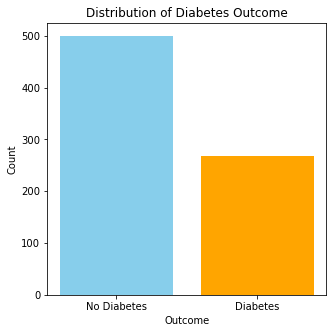

0    500
1    268
Name: Outcome, dtype: int64


In [25]:
plt.figure(figsize=(5,5))
#plt.pie(diabetes_dataset['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', shadow=False, startangle=90)
#plt.title('Diabetes Outcome')
#plt.show()
outcome_counts = diabetes_dataset['Outcome'].value_counts()
labels = ['No Diabetes', 'Diabetes']
values = outcome_counts.values

colors = ['skyblue', 'orange']  # Define colors for the bars

plt.bar(labels, values, color=colors)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Outcome')
plt.show()
print(outcome_counts)

In the whole data of 768 the Diabetes patients are 268 and the non-Diabetes patients are 500

## Age Distribution and Diabetes

C:\Users\Manikanta Mendi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

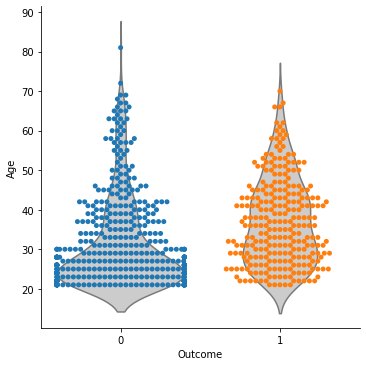

In [26]:
sns.catplot(data=diabetes_dataset, x="Outcome", y="Age", kind="violin", color=".8", inner=None)
sns.swarmplot(data=diabetes_dataset, x="Outcome", y="Age", size=5)

From the catplot, it becomes evident that the majority of diabetes patients fall within the 20-35 age bracket. Furthermore, individuals in the 40-55 age range appear to be more susceptible to diabetes. When contrasting this with other age groups, it's clear that the 20-35 age group has a significantly higher number of diabetes patients in the dataset.

### Pregnancies and Diabetes

Text(0.5, 1.0, 'Pregnancies and Diabetes')

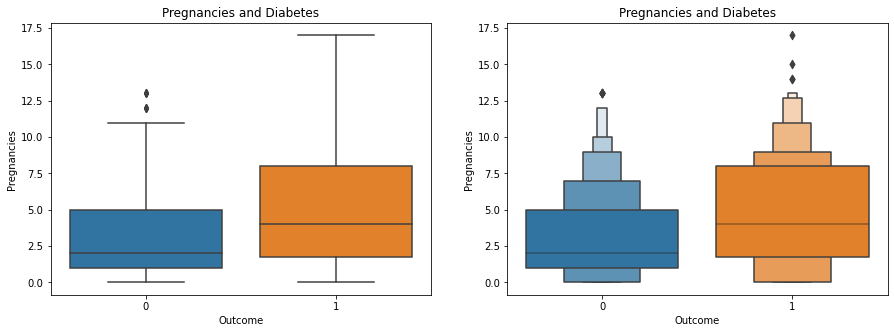

In [27]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
#sns.catplot(x="Outcome", y="Pregnancies", kind="swarm", data=diabetes_dataset)
sns.boxplot(x='Outcome',y='Pregnancies',data=diabetes_dataset,ax=ax[0]).set_title('Pregnancies and Diabetes')
#sns.violinplot(x='Outcome',y='Pregnancies',data=diabetes_dataset,ax=ax[1])
sns.boxenplot(x="Outcome", y="Pregnancies", data=diabetes_dataset).set_title('Pregnancies and Diabetes')

By the Plots of two boxplot and boxenplot clearly showing the realation between the diabetes while being a pregancies are high changes when the number of pregancies increased. and both plot are showing that when the pregnancies numbers is increased the high rate of being diabetic is increased.


### Glucose and Diabetes

Text(0.5, 1.0, 'Glucose vs Diabetes')

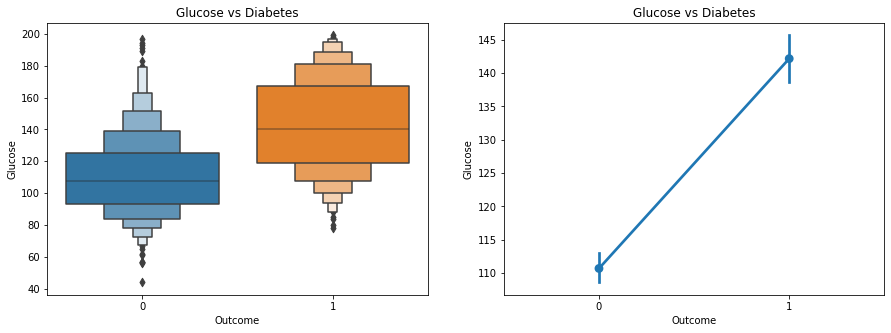

In [28]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

sns.boxenplot(x='Outcome', y='Glucose', data=diabetes_dataset,ax=ax[0]).set_title('Glucose vs Diabetes')

sns.pointplot(x='Outcome', y='Glucose', data=diabetes_dataset,ax=ax[1]).set_title('Glucose vs Diabetes')

In Boxenplot we can understand that the Non-Diabetic or mostly like are below the 120 level of Glucose and the Diabetic or more from the 120 and above in the Glucose level.As we know Glucose is important to find the patient is diabetic or not by seeing the level of Glucose in the body. we can understand by seeing the plot that a diabetic patient level of Glucose is mostly is starting from 120 level of glucose and patients with gloucose level is more than 140 are most like to be a diabetic. The point plot say where most Non-diabetic glucose high point which is 110 and from there to point of a diabetic patient max reaching point at 140.

### Blood Pressuse and Diabetes


Text(0.5, 1.0, 'BloodPressure vs Diabetes')

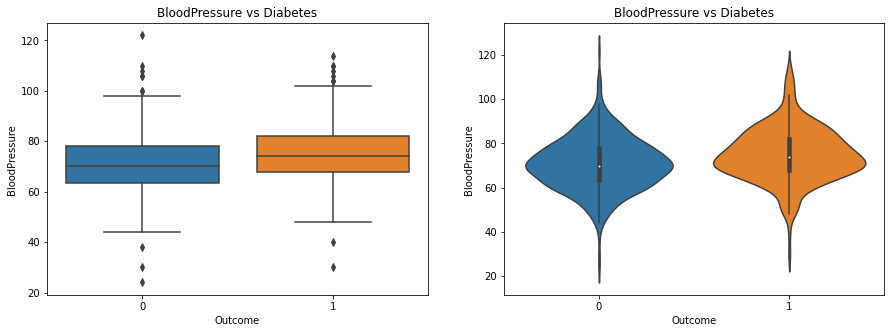

In [29]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=diabetes_dataset, ax=ax[0]).set_title('BloodPressure vs Diabetes')
sns.violinplot(x='Outcome', y='BloodPressure', data=diabetes_dataset, ax=ax[1]).set_title('BloodPressure vs Diabetes')

The boxplot demonstrates that diabetes patients' median blood pressure is marginally higher than that of non-diabetic patients. The violin plot demonstrates that diabetes people have slightly higher blood pressure distribution than non-diabetic patients. However, there isn't enough data to say that high blood pressure is a reliable indicator of diabetes.
The boxplot and violin plot both clearly illustrate the connection between high blood pressure and diabetes.
### Skin Thickness and Diabetes

Text(0.5, 1.0, 'SkinThickness vs Diabetes')

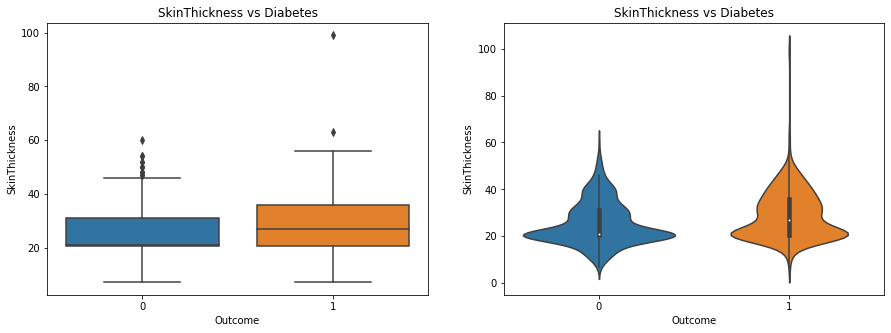

In [30]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='SkinThickness', data=diabetes_dataset,ax=ax[0]).set_title('SkinThickness vs Diabetes')
sns.violinplot(x='Outcome', y='SkinThickness', data=diabetes_dataset,ax=ax[1]).set_title('SkinThickness vs Diabetes')

The boxplot and violin plot both show how diabetes affects skin thickness. The boxplot shows that diabetic individuals have a higher median skin thickness, about 30, than non-diabetic patients, who have a median skin thickness closer to 20. The violin plot shows the distribution of skin thickness in both groups. Non-diabetic patients have a more concentrated distribution of around 20, but diabetic patients have a lower distribution near 20 and a higher distribution of around 30. This shows that skin thickness could be used to detect diabetes.
### Insulin and Diabetes

Text(0.5, 1.0, 'Insulin vs Diabetes')

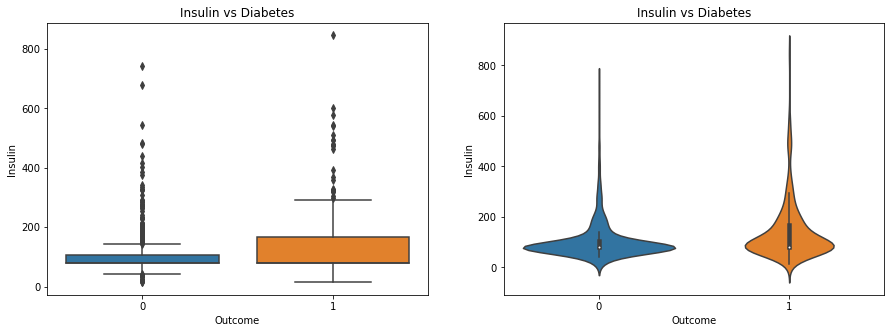

In [31]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Insulin',data=diabetes_dataset,ax=ax[0]).set_title('Insulin vs Diabetes')
sns.violinplot(x='Outcome',y='Insulin',data=diabetes_dataset,ax=ax[1]).set_title('Insulin vs Diabetes')

Insulin has a key hormonal role in controlling glucose metabolism and enabling the body to use carbohydrates, fats, and proteins in an effective manner. Glucose concentrations are directly impacted by variations in insulin levels. Boxplots and violin plots are used to graphically illustrate the distribution of insulin levels in patients. Insulin levels typically range from 100 to 200 in diabetes patients, compared to roughly 100 in non-diabetics. The violin plot shows that non-diabetic patients have a wider distribution of insulin levels around 100, in contrast to diabetes patients who have a more concentrated distribution with a modest spread toward higher insulin levels. 
### BMI and Diabetes

Text(0.5, 1.0, 'BMI and Diabetes')

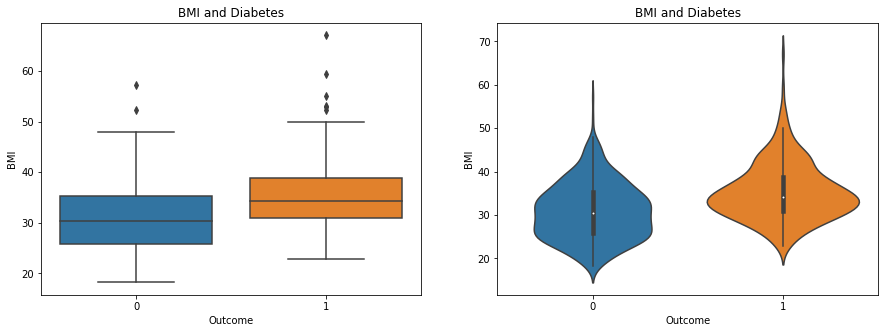

In [32]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='BMI',data=diabetes_dataset,ax=ax[0]).set_title('BMI and Diabetes')
sns.violinplot(x='Outcome',y='BMI',data=diabetes_dataset,ax=ax[1]).set_title('BMI and Diabetes')

The Both Outcome are closely related to each other BMI for being a diabetic or non-diabetic. A Non-diabetic patients are have BMI between 25 to 35 range and A diabetic patients have the range of 30 to 40 BMI level it slight increase in the diabetic patient. so that we can find BMI also could help to find the Diabetic or not.
And in violinplot it more stretched in Diabetic when the BMI is more level to the non-diabetic. 

### Diabetes Pedigree Function and Diabetes Outcome

Text(0.5, 1.0, 'Diabetes Pedigree Function')

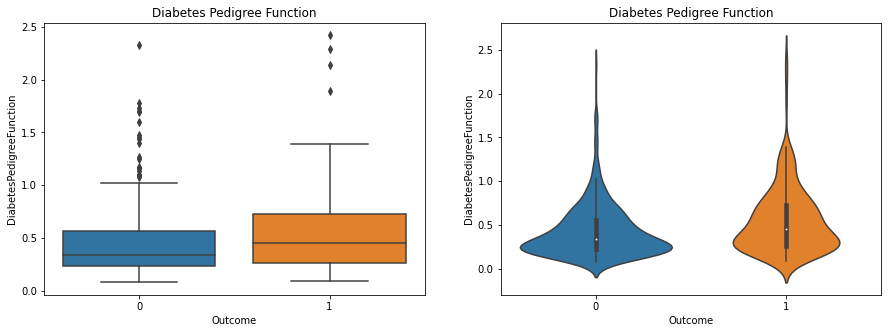

In [33]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=diabetes_dataset,ax=ax[0]).set_title('Diabetes Pedigree Function')
sns.violinplot(x='Outcome',y='DiabetesPedigreeFunction',data=diabetes_dataset,ax=ax[1]).set_title('Diabetes Pedigree Function')

Diabetes Pedigree Function (DPF) calculates diabetes likelihood depending on the subject's age and his/her diabetic family history. From the boxplot, the patients with lower DPF, are much less likely to have diabetes. The patients with higher DPF, are much more likely to have diabetes. In the violinplot, majority of the non diabetic patients have a DPF of 0.25-0.35, whereas the diabetic patients have a increased DPF, which is shown by the their distribution in the violinplot where there is a increased spread in the DPF from 0.5 -1.5. Therefore the DPF is a good indicator of diabetes.

### Coorelation Matrix Heatmap

In [34]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


Text(0.5, 1.0, 'Correlation Heatmap')

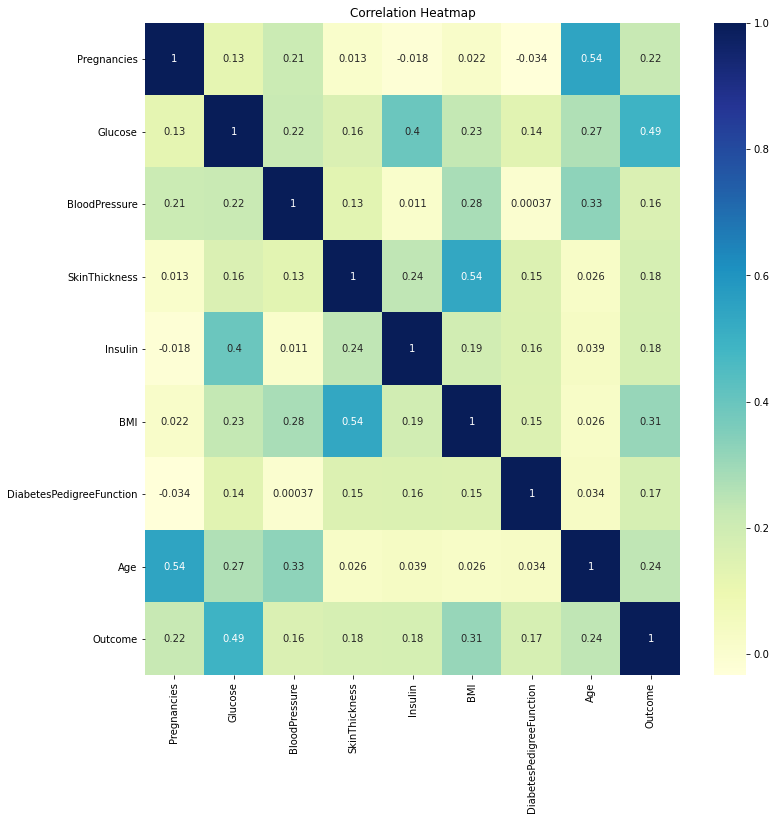

In [35]:
#correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='YlGnBu').set_title('Correlation Heatmap')

We can see from the heatmap that 'Glucose' and 'Outcome' have a correlation coefficient of 0.49. Furthermore, a substantial connection of 0.54 occurs between 'Age' and 'Pregnancies,' which makes sense - as a woman's age increases, so does her pregnancy count. Another intriguing finding is the high association between 'BMI and skin thickness'. Furthermore, we see a correlation between 'insulin' and 'glucose'.

## Train Test Split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=30)


count_outcomes = Y_test.value_counts()
print(count_outcomes)
count_ones = count_outcomes[1]
count_zeros = count_outcomes[0]
#print(f"Count of 1's: {count_ones}")
#print(f"Count of 0's: {count_zeros}")


0    100
1     54
Name: Outcome, dtype: int64


In [37]:
print(X.shape, X_train.shape, X_test.shape)

(768, 7) (614, 7) (154, 7)


## Training the Model

In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier

SVC(kernel='linear')

In [39]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)
classifier.predic = classifier.predict(X_test)
accuracy_score(Y_test, classifier.predic)

0.8051948051948052

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Diabetes Prediction
For predictiong the diabetes, I will be using the following algorithms:

1.Logistic Regression

2.Random Forest Classifier

3.Support Vector Machine

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR
#training the model
LR.fit(X_train, Y_train)
LR.score(X_test, Y_test)
#testing the model
LR_pred = LR.predict(X_test)
LR_accu = accuracy_score(Y_test, LR_pred)
print("Test Accuracy (LR): {:.2f}%".format(LR_accu * 100))
import joblib

# Save the trained model to a file
joblib.dump(LR, 'logistic_regression_model.pkl')


Test Accuracy (LR): 79.22%


['logistic_regression_model.pkl']

### Support Vector Machine (SVM)


In [41]:
from sklearn.svm import SVC
SVM = SVC()
SVM
#training the model
SVM.fit(X_train, Y_train)
SVM.score(X_test, Y_test)
#testing the model
SVM_pred = SVM.predict(X_test)
SVM_accu = accuracy_score(Y_test, SVM_pred)
print("Test Accuracy (SVM): {:.2f}%".format(SVM_accu * 100))
import joblib

# Save the trained model to a file
joblib.dump(SVM, 'svm_model.pkl')

Test Accuracy (SVM): 78.57%


['svm_model.pkl']

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF = RandomForestClassifier(n_estimators=100,random_state=42)
RF.fit(X_train, Y_train)
RF.score(X_test, Y_test)
RF_pred = RF.predict(X_test)
RF_accu = accuracy_score(Y_test, RF_pred)
print("Test Accuracy (SVM): {:.2f}%".format(RF_accu * 100))
import joblib

# Save the trained model to a file
joblib.dump(RF, 'random_forest_model.pkl')


Test Accuracy (SVM): 79.87%


['random_forest_model.pkl']

Accuracy Score

In [43]:
# accuracy score on the training data for LogisticRegression
X_train_prediction = LR.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [44]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7671009771986971


In [45]:
# accuracy score on the training data Support vector machine
X_train_prediction = SVM.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8175895765472313


In [46]:
# accuracy score on the training data Random Forest
X_train_prediction = RF.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [47]:
# accuracy score on the test data
X_test_prediction = LR.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7922077922077922


In [48]:
# accuracy score on the test data
X_test_prediction = RF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7987012987012987


In [49]:
# accuracy score on the test data
X_test_prediction = SVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [50]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7857142857142857


## Evaluation confusion_matrix 
### Evaluation Logistic Regression Model

The diagonal boxes shows the count of true positives for each class. The predicted value is given on top while the actual value is given on the left side. The off-diagonal boxes shows the count of false positives.

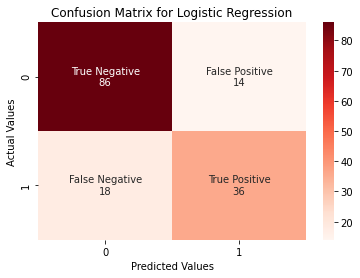

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Y_test and LR_pred are already defined
cm = confusion_matrix(Y_test, LR_pred)

# Define labels
labels = [f'True Negative\n{cm[0,0]}', f'False Positive\n{cm[0,1]}', f'False Negative\n{cm[1,0]}', f'True Positive\n{cm[1,1]}']

# Create a 2D array of labels
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
sns.heatmap(cm, annot=labels, fmt='', cmap='Reds')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


## Distribution plot

C:\Users\Manikanta Mendi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Manikanta Mendi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

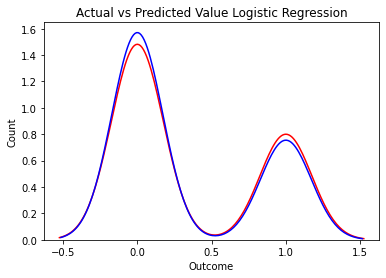

In [52]:
ax = sns.distplot(Y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(LR_pred, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')

These distribution plot clearly visualizes the accuracy of the model. The red color represents the actual values and the blue color represents the predicted values. The more the overlapping of the two colors, the more accurate the model is.

Classification Report

In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       100
           1       0.72      0.67      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



The model has as an average f1 score of 0.755 and acuuracy of 79%.

In [54]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
print('Accuracy Score: ',accuracy_score(Y_test,LR_pred))
print('Mean Absolute Error: ',mean_absolute_error(Y_test,LR_pred))
print('Mean Squared Error: ',mean_squared_error(Y_test,LR_pred))
print('R2 Score: ',r2_score(Y_test, LR_pred))

Accuracy Score:  0.7922077922077922
Mean Absolute Error:  0.2077922077922078
Mean Squared Error:  0.2077922077922078
R2 Score:  0.0874074074074076


### Evaluating Random Forest Model

Confusion Matrix Heatmap

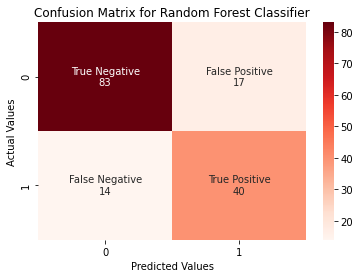

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Y_test and LR_pred are already defined
cm = confusion_matrix(Y_test, RF_pred)

# Define labels
labels = [f'True Negative\n{cm[0,0]}', f'False Positive\n{cm[0,1]}', f'False Negative\n{cm[1,0]}', f'True Positive\n{cm[1,1]}']

# Create a 2D array of labels
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
sns.heatmap(cm, annot=labels, fmt='', cmap='Reds')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

The diagonal boxes shows the count of true positives for each class. The predicted value is given on top while the actual value is given on the left side. The off-diagonal boxes shows the count of false positives.

### Distribution Plot

C:\Users\Manikanta Mendi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Manikanta Mendi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

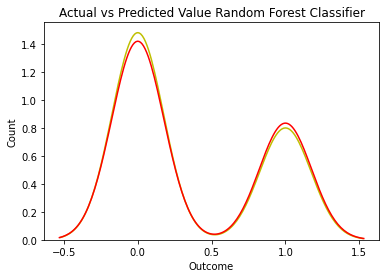

In [56]:
ax = sns.distplot(Y_test, color='y',  label='Actual Value',hist=False)
sns.distplot(RF_pred, color='r', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Random Forest Classifier')
plt.xlabel('Outcome')
plt.ylabel('Count')

These distribution plot clearly visualizes the accuracy of the model. The yellow color represents the actual values and the red color represents the predicted values. The more the overlapping of the two colors, the more accurate the model is.

Classification Report

In [57]:
print(classification_report(Y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       100
           1       0.70      0.74      0.72        54

    accuracy                           0.80       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.80      0.80      0.80       154



The model has as an average f1 score of 0.785 and acuuracy of 80% which more in comparison to Logistic Regression model.

In [58]:
print('Accuracy Score: ',accuracy_score(Y_test,RF_pred))
print('Mean Absolute Error: ',mean_absolute_error(Y_test,RF_pred))
print('Mean Squared Error: ',mean_squared_error(Y_test,RF_pred))
print('R2 Score: ',r2_score(Y_test,RF_pred))

Accuracy Score:  0.7987012987012987
Mean Absolute Error:  0.2012987012987013
Mean Squared Error:  0.2012987012987013
R2 Score:  0.1159259259259261


### Evaluating SVM Model

Confusion Matrix Heatmap

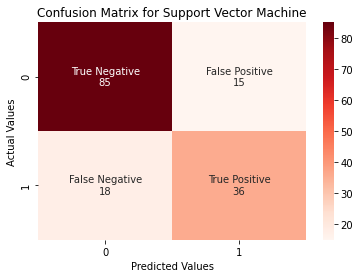

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Y_test and LR_pred are already defined
cm = confusion_matrix(Y_test, SVM_pred)

# Define labels
labels = [f'True Negative\n{cm[0,0]}', f'False Positive\n{cm[0,1]}', f'False Negative\n{cm[1,0]}', f'True Positive\n{cm[1,1]}']

# Create a 2D array of labels
labels = np.asarray(labels).reshape(2,2)

# Plot heatmap
sns.heatmap(cm, annot=labels, fmt='', cmap='Reds')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

The diagonal boxes shows the count of true positives for each class. The predicted value is given on top while the actual value is given on the left side. The off-diagonal boxes shows the count of false positives.

Distribution Plot

C:\Users\Manikanta Mendi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Manikanta Mendi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

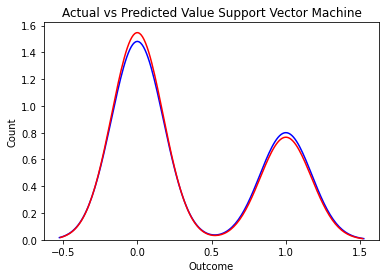

In [60]:
ax = sns.distplot(Y_test, color='b',  label='Actual Value',hist=False)
sns.distplot(SVM_pred, color='r', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Support Vector Machine')
plt.xlabel('Outcome')
plt.ylabel('Count')

These distribution plot clearly visualizes the accuracy of the model. The red color represents the actual values and the blue color represents the predicted values. The more the overlapping of the two colors, the more accurate the model is.

Classification Report

In [61]:
print(classification_report(Y_test, SVM_pred))
      

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.71      0.67      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



The model has as an average f1 score of 0.755 and acuuracy of 78% which is less than to previous model.

In [62]:
print('Accuracy Score: ',accuracy_score(Y_test,SVM_pred))
print('Mean Absolute Error: ',mean_absolute_error(Y_test,SVM_pred))
print('Mean Squared Error: ',mean_squared_error(Y_test,SVM_pred))
print('R2 Score: ',r2_score(Y_test,SVM_pred))

Accuracy Score:  0.7857142857142857
Mean Absolute Error:  0.21428571428571427
Mean Squared Error:  0.21428571428571427
R2 Score:  0.0588888888888891


## Comparing the models

Text(0.5, 1.0, 'Comparison of different models')

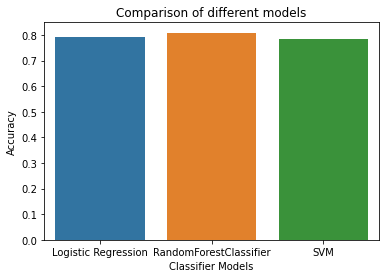

In [63]:
#comparing the accuracy of different models
sns.barplot(x=['Logistic Regression', 'RandomForestClassifier', 'SVM'], y=[0.7922077922077922,0.8087012987012987,0.7857142857142857])
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

## Making a Predictive System

In [64]:
input_data = (2,146,76,194,38.2,0.329,29)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)
classifier.predict
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.54791859  0.7995213   0.30931457  0.80993387  0.83674603 -0.43150339
  -0.36084741]]
[1]
The person is diabetic


## Logistic Regression Model 

In [65]:
input_data = (6,119,50,176,27.1,1.318,33)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = LR.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.63994726 -0.08816373 -1.83801875  0.61642655 -0.77876382  2.55539398
  -0.0204964 ]]
[0]
The person is not diabetic


## Random Forest Model

In [66]:
input_data = (6,119,50,176,27.1,1.318,33)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = RF.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.63994726 -0.08816373 -1.83801875  0.61642655 -0.77876382  2.55539398
  -0.0204964 ]]
[1]
The person is diabetic


### Support Vector Machine Model


In [67]:
input_data = (6,119,50,176,27.1,1.318,33)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = SVM.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.63994726 -0.08816373 -1.83801875  0.61642655 -0.77876382  2.55539398
  -0.0204964 ]]
[1]
The person is diabetic


## Conclusion
From the exploratory data analysis, I have concluded that the risk of diabetes depends upon the following factors:

1. Glucose level

2. Number of pregnancies

3. Insulin level

4. BMI

With in increase in Glucose level, insulin level, BMI and number of pregnancies, the risk of diabetes increases. However, the number of pregnancies have strange effect of risk of diabetes which couldn't be explained by the data. The risk of diabetes also increases with increase in skin thickness.

Coming to the classification models, Logistic Regression and Random Forest outperformed SVM with 80% and 79.22%accuracy. The accuracy of the model can be improved by increasing the size of the dataset. The dataset used for this project was small and had only 768 rows.

In [68]:
9,184,85,15,0,30,1.213,49

(9, 184, 85, 15, 0, 30, 1.213, 49)

In [69]:
import tkinter as tk
from tkinter import messagebox
from sklearn.preprocessing import StandardScaler
import joblib

# Load the pre-trained models and scaler
lr = joblib.load('logistic_regression_model.pkl')
rf_classifier = joblib.load('random_forest_model.pkl')
svm = joblib.load('svm_model.pkl')
scaler = joblib.load('scaler.pkl')

# Create the main application window
app = tk.Tk()
app.title("Diabetes Prediction")

# Create input fields
labels = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
entries = []

for label in labels:
    row = tk.Frame(app)
    lab = tk.Label(row, width=20, text=label, anchor='w')
    ent = tk.Entry(row)
    row.pack(side=tk.TOP, fill=tk.X, padx=5, pady=5)
    lab.pack(side=tk.LEFT)
    ent.pack(side=tk.RIGHT, expand=tk.YES, fill=tk.X)
    entries.append(ent)

# Prediction function
def predict():
    input_data = [float(entry.get()) for entry in entries]
    input_data_as_numpy_array = scaler.transform([input_data])
    
    prediction_lr = lr.predict(input_data_as_numpy_array)
    prediction_rf = rf_classifier.predict(input_data_as_numpy_array)
    prediction_svm = svm.predict(input_data_as_numpy_array)
    
    if prediction_lr[0] == 0:
        result_lr.config(text="LR: Not Diabetic")
    else:
        result_lr.config(text="LR: Diabetic")
    
    if prediction_rf[0] == 0:
        result_rf.config(text="RF: Not Diabetic")
    else:
        result_rf.config(text="RF: Diabetic")
    
    if prediction_svm[0] == 0:
        result_svm.config(text="SVM: Not Diabetic")
    else:
        result_svm.config(text="SVM: Diabetic")

# Create a prediction button
predict_button = tk.Button(app, text="Predict", command=predict)
predict_button.pack()

# Create labels to display predictions
result_lr = tk.Label(app, text="LR Prediction will appear here")
result_lr.pack()
result_rf = tk.Label(app, text="RF Prediction will appear here")
result_rf.pack()
result_svm = tk.Label(app, text="SVM Prediction will appear here")
result_svm.pack()

# Start the GUI event loop
app.mainloop()
